# Filtering AnnData with cell sizes

In [149]:
import pandas as pd
import anndata as ad
from pathlib import Path
import numpy as np
import glob
from tqdm import tqdm
from skimage import io

### Function to add cell sizes to AnnData from a mask folder

In [150]:
def add_cell_sizes_to_adata(adata, mask_dict='masks', ROI_obs='ROI', X_loc_obs='X_loc', Y_loc_obs='Y_loc', new_col='cell_size'):
    
    from pathlib import Path
    import glob
    from tqdm import tqdm
    from skimage import io
    
    # Get a list of all masks in the mask directory
    paths = glob.glob(str(Path(mask_dict, "*")))

    # Create a dictionary of all masks for ROIs
    masks_dict = {}
    for p in paths:
        masks_dict.update({Path(p).stem:io.imread(p)})

    # Itterate through all cells, 
    for i, cell in tqdm(adata.obs.iterrows(), total=adata.obs.shape[0]): 
        mask = masks_dict[cell[ROI_obs]]

        cell_value = mask[int(cell[Y_loc_obs]), int(cell[X_loc_obs])]

        cell_pixels = len(mask[mask==cell_value])

        adata.obs.loc[i, new_col] = int(cell_pixels)

### Run function on data
This will add a new column to adata.obs with the cell size in pixels, with each pixel being 1 um2

In [ ]:
add_cell_sizes_to_adata(adata)

 30%|█████████████████████▊                                                  | 163460/539338 [01:45<04:14, 1477.11it/s]

### See what spread of cell sizes we have in data

<AxesSubplot:>

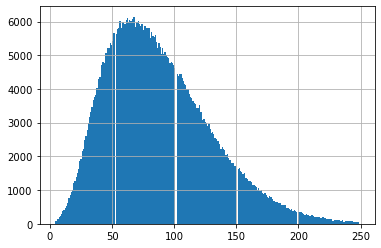

In [132]:
max_cell_size=250

adata.obs.cell_size[adata.obs.cell_size<max_cell_size].hist(bins=max_cell_size)

### Add a column that filters based upon a being between a min and max size

In [142]:
max_size = 150
min_size = 20

adata.obs['cell_size_filter'] = (min_size < adata.obs['cell_size']) & (max_size > adata.obs['cell_size'])

### Plot what new filter would look like

<AxesSubplot:>

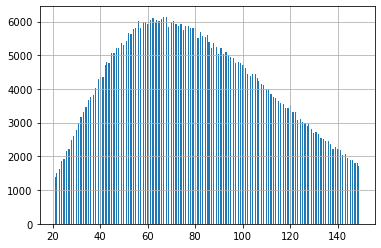

In [143]:
adata[adata.obs['cell_size_filter']].obs.cell_size[adata.obs.cell_size<max_cell_size].hist(bins=max_cell_size)

### <font color='red'>Permanantly</font> remove all cells of wrong size

In [144]:
adata = adata[adata.obs['cell_size_filter']]